# k-Nearest Neighbors (KNN) Algorithm

KNN is a simple, yet powerful supervised machine learning algorithm used for both classification and regression tasks. It operates on the principle that similar data points are often in close proximity.

## How KNN Works:
- **Classification**: A data point is classified by a majority vote of its neighbors, with the data point being assigned to the class most common among its k nearest neighbors.
- **Regression**: It uses the average of the k nearest neighbors, or a weighted average if distance weighting is used, to predict a value.

## Key Characteristics:
- **Non-parametric**: KNN makes no assumptions about the underlying data distribution.
- **Instance-based**: It memorizes the training instances which are used as the "knowledge base" for prediction phase.

## Pros:
- **Simplicity**: Easy to implement and understand.
- **Versatility**: Effective for both classification and regression.
- **No Training Phase**: Since it's an instance-based learning, there's no explicit training phase.

## Cons:
- **Scalability**: Slows significantly as the size of data increases.
- **Curse of Dimensionality**: Performance degrades with high dimensional data.
- **Sensitive to Irrelevant Features**: Requires feature selection to avoid performance reduction due to noisy features.

KNN is widely used in applications ranging from recommendation systems to pattern recognition due to its simplicity and ease of implementation.


# k-Nearest Neighbors (k-NN) Algorithm with the Wine Dataset

This notebook explores the application of the k-Nearest Neighbors (k-NN) algorithm on the Wine dataset. The k-NN algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used for both classification and regression tasks, but here it will be used to classify wines into one of three possible cultivar classes.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

In [6]:
# Load the dataset
data = load_wine()
wine_df = pd.DataFrame(data.data, columns=data.feature_names)
wine_df['target'] = data.target

# Display basic info and the first few rows
wine_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [7]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Data Preprocessing

To prepare the data for k-NN, we will standardize the feature set since k-NN is sensitive to the magnitude of features and operates based on distances.



In [8]:
# Define the features and the target
X = wine_df.drop('target', axis=1)
y = wine_df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Training the k-NN Model

We will train a k-NN model and find the best number of neighbors using a simple loop to compare accuracies.


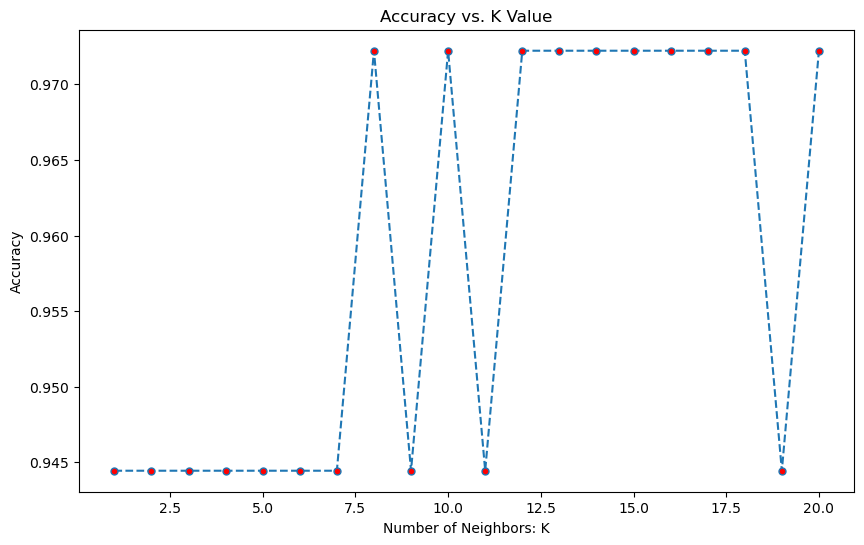

In [9]:
accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    accuracies.append(knn.score(X_test_scaled, y_test))

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies, marker='o', linestyle='dashed', markersize=5, markerfacecolor='red')
plt.title('Accuracy vs. K Value')
plt.xlabel('Number of Neighbors: K')
plt.ylabel('Accuracy')
plt.show()


## k-NN Accuracy vs. K Value Analysis

The plot above illustrates the accuracy of the k-Nearest Neighbors (k-NN) algorithm on the Wine dataset as a function of K, the number of neighbors considered for voting.

### Observations:
- The accuracy is relatively stable across different K values.
- A pattern of slight fluctuation is observed, with some peaks and troughs, indicating variance in accuracy with changes in K.
- The accuracy reaches its peak and plateaus at several points, notably at K values of 10, 13, 16, 18, and 20.

### Best K Value:
- The highest accuracies are observed at K=10, K=13, K=16, K=18, and K=20, where the accuracy surpasses 97%.
- To minimize complexity and potential overfitting, the lowest K among these—**K=10**—can be considered the optimal choice. It offers high accuracy while keeping the model simpler and more generalizable.

Choosing K=10 strikes a balance between accuracy and model simplicity, making it the preferred choice for this dataset.


## Model Evaluation

Once the best K value is identified, we evaluate the model using various metrics.


In [10]:
# The optimal k found is 10 based on previous step
knn_optimal = KNeighborsClassifier(n_neighbors=10)
knn_optimal.fit(X_train_scaled, y_train)
y_pred = knn_optimal.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[14  0  0]
 [ 1 13  0]
 [ 0  0  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

Accuracy:  0.9722222222222222


## k-NN Model Performance Analysis

The k-Nearest Neighbors (k-NN) model was evaluated on the Wine dataset, and the performance metrics are as follows:

### Confusion Matrix Insights:
- The model successfully classified all instances of class 0 and class 2 with no errors.
- There was a single misclassification in class 1, where one instance was predicted as class 0.

### Classification Report Summary:
- **Precision**: The model had no false positives for classes 1 and 2, and a slight imperfection for class 0 (0.93).
- **Recall**: Class 0 and class 2 had perfect recall scores, whereas class 1 had a minor shortfall (0.93).
- **F1-Score**: Reflecting the precision and recall scores, the f1-scores are near perfect across all classes, indicating a strong balance between precision and recall.

### Overall Accuracy:
- The model achieved a high overall accuracy of 97.22%, demonstrating its excellent capability to classify the wine instances correctly.

### Conclusion:
The k-NN model displayed impressive classification performance with almost all predictions being correct. The balance between precision and recall suggests that the model is well-tuned for this particular dataset. The single misclassification indicates a near-perfect fit without significant signs of overfitting.
